https://github.com/audezeHx/DSCI235_Final/blob/main/Final_Report.ipynb

#  DSCI 235 spr 2023 Final Report

---

## **Team member**
Junhwan Kim

---

## **Topic** 
The relation between IVC (Inverted Yield Curve) and future economic conditions.

---

## **Interest** 
I choose this topic because I heard about the IVC recently from the news and it seems to be used as important features to predict future economic condition. According to the news, IVC happens when long-term interest rates is lower than the short-term interest rates and it can lead to adverse economic conditions such as recession or depression. However, I have not studied this kind of economics before, so I want to understand more about this subject and to see if the claim made in the news is actually true.

---

## **Data**

I will use
- Yearly long term interest rates as LIR_Y
- Yearly short term interest rates as SIR_Y
- Yearly gross national income as GNI_Y
- Yearly Inverted Yield Curve as IVC_Y
- Quarterly long term interest rates as LIR_Q
- Quarterly short term interest rates as SIR_Q
- Quarterly Gross domestic product compare to previous quarter as GDP_Q
- Quarterly unemployment rate as UPR_Q
- Quarterly Inverted Yield Curve as IVC_Q

IVC data can be obtained by subtracting the short-term interest rate (SIR) from the long-term interest rate (LIS) and collecting negative quarters.

- The countries that have been selected are 16 countries. Austrailia(AUS), Austria(AUT), Belgium(BEL), Canada(CAN), Denmark(DNK), Finland(FIN), Germany(DEU), Ireland(IRL), Italy(ITA), Netherland(NLD), Norway(NOR), Portugal(PRT), Spain(ESP), Sweden(SWE), United Kingdom(GBR), United States(USA).
- The standard for country selection is whether LIR, SIR, GNI, GDP, and UPR are all provided by the OECD site.
- The period that have been selected are after 1995.
- The standard for determining the period is the maximum value provided by the OECD site for LIR, SIR, GNI, GDP, and UPR.

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [454]:
LIR_Y = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Long_term_interest_rates_yearly.csv")
SIR_Y = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Short_term_interest_rates_quarterly.csv")
GNI_Y = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Gross_national_income_yearly.csv")
LIR_Q = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Long_term_interest_rates_qurterly.csv")
SIR_Q = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Short_term_interest_rates_quarterly.csv")
GDP_Q = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/GDP_Quarterly.csv")
UPR_Q = pd.read_csv("https://github.com/audezeHx/DSCI235_Final/raw/main/datasets/Unemployment_rate_quarterly.csv")

---

## **Source**
All the datasets are from OECD Data website(https://data.oecd.org/). Since this is the official OECD site, the reliability of the data is very high and use for non-commercial purposes is permitted.

---

## **Question**
**Main question: Can IVC indicators predict future economic conditions?**

Three steps to solve the main question
- 0. Merge the data
- 1. Find the country and period that IVC happens
- 2. Find the country and period that economic recession happens
- 3. Check if there is a correlation between the data from the previous two steps

## Step 0: Merge the data

### Merge data of GNI_Y, LIR_Y, SIR_Y

In [455]:
Value_Yealy = pd.DataFrame()
Value_Yealy['Location'] = GNI_Y['LOCATION']
Value_Yealy['Time_Y'] = GNI_Y['TIME']
Value_Yealy['GNI_Y'] = GNI_Y['Value']
Value_Yealy['LIR_Y'] = LIR_Y['Value']
Value_Yealy['SIR_Y'] = SIR_Y['Value']
Value_Yealy.head()

,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y
0,AUS,1995,21649.133893,9.210896,8.193334
1,AUS,1996,22507.576692,8.209207,7.713333
2,AUS,1997,23706.226955,6.954918,7.543334
3,AUS,1998,24906.013150,5.492970,7.453333
4,AUS,1999,26356.744688,6.009312,7.486667


### Merge data of LIR_Q, SIR_Q, GDP_Q, UPR_Q without 2023-Q1

- Remove 2023-Q1 from LIR_Q and SIR_Q

In [456]:
LIR_2022_Q4 = LIR_Q[LIR_Q['TIME'] != '2023-Q1']
SIR_2022_Q4 = SIR_Q[SIR_Q['TIME'] != '2023-Q1']

- Merge data of LIR_Q, SIR_Q, GDP_Q, UPR_Q

In [457]:
Value_Quarterly = pd.DataFrame()
Value_Quarterly['Location'] = GDP_Q['LOCATION']
Value_Quarterly['Time_Q'] = GDP_Q['TIME']
Value_Quarterly['LIR_Q'] = LIR_2022_Q4['Value']
Value_Quarterly['SIR_Q'] = SIR_2022_Q4['Value']
Value_Quarterly['GDP_Q'] = GDP_Q['Value']
Value_Quarterly['UPR_Q'] = UPR_Q['Value']
Value_Quarterly.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q
0,AUS,1995-Q1,10.206270,8.193334,0.012790,8.764897
1,AUS,1995-Q2,9.253700,7.713333,0.419946,8.364933
2,AUS,1995-Q3,8.964148,7.543334,2.261020,8.368115
3,AUS,1995-Q4,8.419457,7.453333,-0.018881,8.389695
4,AUS,1996-Q1,8.389683,7.486667,1.647736,8.399638


### Merge data of LIR_Q and SIR_Q of 2023-Q1

- Find 2023-Q1 data of LIR_Q, SIR_Q

In [458]:
LIR_2023 = LIR_Q[LIR_Q['TIME'] == '2023-Q1']
SIR_2023 = SIR_Q[SIR_Q['TIME'] == '2023-Q1']

- Merge 2023-Q1 data of LIR_Q, SIR_Q

In [459]:
LIR_SIR_2023 = pd.DataFrame()
LIR_SIR_2023['Location'] = LIR_2023['LOCATION']
LIR_SIR_2023['Time_Q'] = LIR_2023['TIME']
LIR_SIR_2023['LIR_Q'] = LIR_2023['Value']
LIR_SIR_2023['SIR_Q'] = SIR_2023['Value']
LIR_SIR_2023 = LIR_SIR_2023.reset_index().drop(['index'], axis=1)

## Step 1: Find the country and period that IVC happens

### Substract SIR_Y from LIR_Y to find IVC_Y

In [460]:
Value_Yealy['IVC_Y'] = Value_Yealy['LIR_Y']- Value_Yealy['SIR_Y']
Value_Yealy.head()

,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y,IVC_Y
0,AUS,1995,21649.133893,9.210896,8.193334,1.017562
1,AUS,1996,22507.576692,8.209207,7.713333,0.495874
2,AUS,1997,23706.226955,6.954918,7.543334,-0.588416
3,AUS,1998,24906.013150,5.492970,7.453333,-1.960363
4,AUS,1999,26356.744688,6.009312,7.486667,-1.477355


### Substract SIR_Q from LIR_Q to find IVC_Q

- Substract SIR_Q from LIR_Q to find IVC_Q of Value_Quarterly

In [461]:
Value_Quarterly['IVC_Q'] = Value_Quarterly['LIR_Q'] - Value_Quarterly['SIR_Q']
Value_Quarterly.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q
0,AUS,1995-Q1,10.206270,8.193334,0.012790,8.764897,2.012936
1,AUS,1995-Q2,9.253700,7.713333,0.419946,8.364933,1.540367
2,AUS,1995-Q3,8.964148,7.543334,2.261020,8.368115,1.420814
3,AUS,1995-Q4,8.419457,7.453333,-0.018881,8.389695,0.966124
4,AUS,1996-Q1,8.389683,7.486667,1.647736,8.399638,0.903016


- Substract SIR_Q from LIR_Q to find IVC_Q of LIR_SIR_2023

In [462]:
LIR_SIR_2023['IVC_Q'] = LIR_SIR_2023['LIR_Q'] - LIR_SIR_2023['SIR_Q']
LIR_SIR_2023.head()

,Location,Time_Q,LIR_Q,SIR_Q,IVC_Q
0,AUS,2023-Q1,3.600000,3.473333,0.126667
1,AUT,2023-Q1,2.970333,2.631933,0.338400
2,BEL,2023-Q1,2.930000,2.631933,0.298067
3,CAN,2023-Q1,3.035103,4.742661,-1.707558
4,DNK,2023-Q1,2.509667,2.849375,-0.339708


### Collect the negative IVC_Y result

In [463]:
IVC_2022_Yneg = Value_Yealy[Value_Yealy['IVC_Y'] < 0]
IVC_2022_Yneg.head()

,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y,IVC_Y
2,AUS,1997,23706.226955,6.954918,7.543334,-0.588416
3,AUS,1998,24906.013150,5.492970,7.453333,-1.960363
4,AUS,1999,26356.744688,6.009312,7.486667,-1.477355
5,AUS,2000,27520.183006,6.314569,7.563334,-1.248765
6,AUS,2001,28745.141332,5.615264,7.130000,-1.514736


### Collect the negative IVC_Q result

- Collect the negative IVC_Q result until 2022-Q4

In [464]:
IVC_2022_Qneg = Value_Quarterly[Value_Quarterly['IVC_Q'] < 0]
IVC_2022_Qneg.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q
22,AUS,2000-Q3,6.175162,6.420000,0.277602,5.988972,-0.244838
23,AUS,2000-Q4,5.880219,6.313334,-0.370983,6.171242,-0.433115
24,AUS,2001-Q1,5.285803,5.546667,1.035857,6.365891,-0.260864
39,AUS,2004-Q4,5.344444,5.416667,0.746480,5.117148,-0.072223
40,AUS,2005-Q1,5.467404,5.620000,0.759551,5.106397,-0.152596


- Collect the 2023-Q1 negative IVC_Q result 

In [465]:
IVC_2023_neg = LIR_SIR_2023[LIR_SIR_2023['IVC_Q'] < 0]
IVC_2023_neg.head()

,Location,Time_Q,LIR_Q,SIR_Q,IVC_Q
3,CAN,2023-Q1,3.035103,4.742661,-1.707558
4,DNK,2023-Q1,2.509667,2.849375,-0.339708
6,DEU,2023-Q1,2.315568,2.631933,-0.316365
10,NOR,2023-Q1,3.061733,3.403333,-0.341600
13,SWE,2023-Q1,2.267267,2.980400,-0.713133


## Step 2: Find the country and period that economic recession happens

Standard of Economic Recession that I choose
- 1. GNI - One consecutive years of negative gross decline more than 1.5%. ex) If 2020_Y GNI is 1.5% lower than 2019 GNI_Y, 2019 year is defined as economic recession
- 2. GDP - Two consecutive quarters of negative gross ex) If 2020-Q1 GDP_Q and 2019-Q4 GDP_Q is both negative, 2020-Q1 is defined as economic recession
- 3. UPR - One consecutive years of positive gross rise more than 1.5%. ex) If 2020-Q1 UPR_Q is 1.5% higher than 2019-Q4, 2019-Q4 is defined as economic recesion



### Find economic recession with GNI_Y

- Define NEW_GNI_Y by substract between previous GNI_Y and current GNI_Y

In [466]:
country = Value_Yealy['Location'].unique()
new_GNI_Y = pd.DataFrame()

for i in country :
    ex_GNI_Y = pd.DataFrame()
    this_year_GNI_Y = Value_Yealy[Value_Yealy['Location'] == i]['GNI_Y'].tail(-1).reset_index(drop=True)
    last_year_GNI_Y = Value_Yealy[Value_Yealy['Location'] == i]['GNI_Y'].head(Value_Yealy[Value_Yealy['Location'] == i]['GNI_Y'].shape[0] -1).reset_index(drop=True)
    ex_GNI_Y = this_year_GNI_Y/last_year_GNI_Y*100-100
    ex_GNI_Y.loc[len(ex_GNI_Y.index)] = np.nan
    new_GNI_Y = pd.concat([new_GNI_Y, ex_GNI_Y], ignore_index = True)

    
Value_Yealy['NEW_GNI_Y'] = new_GNI_Y
Value_Yealy.head()


,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y,IVC_Y,NEW_GNI_Y
0,AUS,1995,21649.133893,9.210896,8.193334,1.017562,3.965252
1,AUS,1996,22507.576692,8.209207,7.713333,0.495874,5.325541
2,AUS,1997,23706.226955,6.954918,7.543334,-0.588416,5.061059
3,AUS,1998,24906.013150,5.492970,7.453333,-1.960363,5.824824
4,AUS,1999,26356.744688,6.009312,7.486667,-1.477355,4.414196


- Find the NEW_GNI_Y that is smaller than 1.5%

In [467]:
GNI_Y_econ_rec = Value_Yealy[Value_Yealy['NEW_GNI_Y'] < -1.5]
GNI_Y_econ_rec.head()

,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y,IVC_Y,NEW_GNI_Y
41,AUT,2008,41660.642669,4.358525,5.696667,-1.338142,-1.802233
52,AUT,2019,59548.613171,0.062933,7.590000,-7.527067,-2.992645
80,BEL,2019,56340.906308,0.193333,2.453333,-2.260000,-2.201092
97,CAN,2008,39783.102761,3.605302,1.503333,2.101969,-3.988880
103,CAN,2014,45014.460327,2.230830,0.036667,2.194163,-2.285302


### Find economic recession with GDP_Q

In [468]:
GDP_Q_econ_rec = Value_Quarterly[(Value_Quarterly['GDP_Q'] <0) &(Value_Quarterly['GDP_Q'].shift(-1) <0)]
GDP_Q_econ_rec.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q
100,AUS,2020-Q1,1.006667,0.770000,-0.168599,5.182653,0.236667
136,AUT,2001-Q1,5.394267,5.024167,-0.227455,3.633333,0.370100
166,AUT,2008-Q3,4.539700,4.860466,-0.644419,4.466667,-0.320766
167,AUT,2008-Q4,4.573300,4.981800,-2.263198,4.733333,-0.408500
168,AUT,2009-Q1,4.140400,4.214667,-1.778953,5.066667,-0.074267


### Find economic recession with UPR_Q

- Define NEW_UPR_Q by substract between current UPR_Q and previous UPR_Q

In [469]:
new_UPR_Q = pd.DataFrame()

for i in country :
    ex_UPR_Q = pd.DataFrame()
    this_year_UPR_Q = Value_Quarterly[Value_Quarterly['Location'] == i]['UPR_Q'].tail(-1).reset_index(drop=True)
    last_year_UPR_Q = Value_Quarterly[Value_Quarterly['Location'] == i]['UPR_Q'].head(Value_Quarterly[Value_Quarterly['Location'] == i]['UPR_Q'].shape[0] -1).reset_index(drop=True)
    ex_UPR_Q = this_year_UPR_Q-last_year_UPR_Q
    ex_UPR_Q.loc[len(ex_UPR_Q.index)] = np.nan
    new_UPR_Q = pd.concat([new_UPR_Q, ex_UPR_Q], ignore_index = True)
    new_UPR_Q.reset_index()
    
Value_Quarterly['NEW_UPR_Q'] = new_UPR_Q


- Find the NEW_UPR_Q that is smaller than 1.5%

In [470]:
UPR_Q_econ_rec = Value_Quarterly[Value_Quarterly['NEW_UPR_Q'] > 1.5]
UPR_Q_econ_rec.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q,NEW_UPR_Q
100,AUS,2020-Q1,1.006667,0.770000,-0.168599,5.182653,0.236667,1.735324
212,AUT,2020-Q1,-0.109133,-0.402967,-2.459993,4.566667,0.293833,2.433333
436,CAN,2020-Q1,1.616548,1.859268,-2.128338,6.533333,-0.242720,6.833337
839,IRL,2008-Q4,4.026667,3.820333,-4.588043,8.533334,0.206334,2.333336
840,IRL,2009-Q1,4.376667,4.064833,0.117301,10.866670,0.311834,1.733330


## Step 3: Check if there is a correlation between the data from the previous two steps

### Number of economic recession happens by each GDP_Q and UPR_Q with IVC_Q and percentage

- Number of negative IVC_Q and economic recssion happens by GDP_Q 

In [471]:
IVC_GDP_Q = pd.merge(IVC_2022_Qneg,GDP_Q_econ_rec,how='inner')
IVC_GDP_Q.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q
0,AUT,2008-Q3,4.539700,4.860466,-0.644419,4.466667,-0.320766
1,AUT,2008-Q4,4.573300,4.981800,-2.263198,4.733333,-0.408500
2,AUT,2009-Q1,4.140400,4.214667,-1.778953,5.066667,-0.074267
3,BEL,2008-Q3,4.236667,4.480000,-0.584323,7.500000,-0.243333
4,BEL,2008-Q4,4.573333,4.860466,-2.168833,6.833333,-0.287133


In [472]:
IVC_GDP_Q.shape[0]

28

- Percentage of negative IVC_Q and economic recssion happens by GDP_Q 

In [473]:
IVC_GDP_Q.shape[0]/IVC_2022_Qneg.shape[0]*100

13.526570048309178

- Number of negative IVC_Q and economic recssion happens by UPR_Q 

In [474]:
IVC_UPR_Q = pd.merge(IVC_2022_Qneg,UPR_Q_econ_rec,how='inner')
IVC_UPR_Q.head()

,Location,Time_Q,LIR_Q,SIR_Q,GDP_Q,UPR_Q,IVC_Q,NEW_UPR_Q
0,CAN,2020-Q1,1.616548,1.859268,-2.128338,6.533333,-0.24272,6.833337


In [475]:
IVC_UPR_Q.shape[0]

1

- Percentage of negative IVC_Q and economic recssion happens by UPR_Q 

In [476]:
IVC_UPR_Q.shape[0]/IVC_2022_Qneg.shape[0]*100

0.4830917874396135

### Number of economic recession happens by GNI_Y with IVC_Y

- Number of negative IVC_Y and economic recssion happens by GNI_Y 

In [477]:
IVC_GNI_Y = pd.merge(IVC_2022_Yneg,GNI_Y_econ_rec,how='inner')
IVC_GNI_Y.head()

,Location,Time_Y,GNI_Y,LIR_Y,SIR_Y,IVC_Y,NEW_GNI_Y
0,AUT,2008,41660.642669,4.358525,5.696667,-1.338142,-1.802233
1,AUT,2019,59548.613171,0.062933,7.590000,-7.527067,-2.992645
2,BEL,2019,56340.906308,0.193333,2.453333,-2.260000,-2.201092
3,DEU,2019,59329.093999,-0.253634,0.081467,-0.335101,-1.995127
4,ITA,2019,46187.956016,1.951412,4.737600,-2.786188,-5.443436


In [478]:
IVC_GNI_Y.shape[0]

8

- Percentage of negative IVC_Y and economic recssion happens by GNI_Y

In [479]:
IVC_GNI_Y.shape[0]/IVC_2022_Yneg.shape[0]*100

5.517241379310345

Through the above results, it was found that IVC was related to GDP and GNI rather than UPR. And although the related figures are not large, it is thought to be helpful in predicting the future economic situation. However, since the correlation between IVC and GDP,GNI is not very high, it should be used only as a reference and should not be trusted with great confidence.

### - Visualize negative IVC_Y and IVC_Q of most frequent and severe country until 2022 as an example with GDP_Q and GNI_Y

- Find negative IVC_Y of most severe country until 2022-Q4

In [480]:
severe_IVC_Y = IVC_2022_Yneg['IVC_Y'].idxmin()
IVC_2022_Yneg.loc[severe_IVC_Y]['Location']

'AUT'

- Find negative IVC_Y of most frequent country until 2022-Q4

In [481]:
frequent_IVC_Y = IVC_2022_Yneg.pivot_table(index = ['Location'], aggfunc ='size')
frequent_IVC_Y.idxmax()

'AUT'

- Find negative IVC_Y of most severe country until 2022-Q4

In [482]:
severe_IVC_Q = IVC_2022_Qneg['IVC_Q'].idxmin()
IVC_2022_Qneg.loc[severe_IVC_Q]['Location']

'NOR'

- Find negative IVC_Y of most frequent country until 2022-Q4

In [483]:
frequent_IVC_Q = IVC_2022_Qneg.pivot_table(index = ['Location'], aggfunc ='size')
frequent_IVC_Q.idxmax()

'NOR'

- Visualize two data as line chart

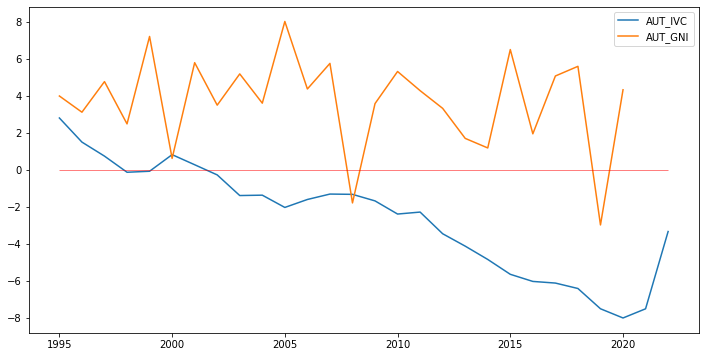

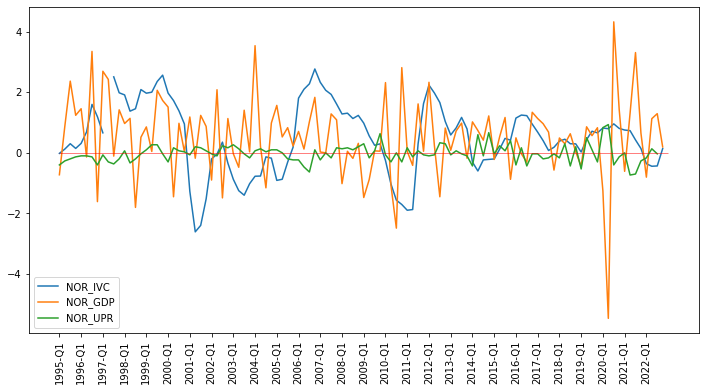

In [484]:
most_freq_IVC_Y = Value_Yealy[Value_Yealy['Location'] == frequent_IVC_Y.idxmax()]
plt.figure(figsize=(12,6))

plt.plot(most_freq_IVC_Y['Time_Y'], most_freq_IVC_Y['IVC_Y'], label=frequent_IVC_Y.idxmax()+"_IVC")
plt.plot(most_freq_IVC_Y['Time_Y'], most_freq_IVC_Y['NEW_GNI_Y'], label =frequent_IVC_Y.idxmax()+"_GNI")
plt.hlines(y = 0, xmin = 1995, xmax = 2022, linewidth=0.5, color='r')
plt.legend()
plt.show()

most_freq_IVC_Q = Value_Quarterly[Value_Quarterly['Location'] == frequent_IVC_Q.idxmax()]
plt.figure(figsize=(12,6))

plt.plot(most_freq_IVC_Q['Time_Q'], most_freq_IVC_Q['IVC_Q'], label=frequent_IVC_Q.idxmax()+"_IVC")
plt.plot(most_freq_IVC_Q['Time_Q'], most_freq_IVC_Q['GDP_Q'], label=frequent_IVC_Q.idxmax()+"_GDP")
plt.plot(most_freq_IVC_Q['Time_Q'], most_freq_IVC_Q['NEW_UPR_Q'], label=frequent_IVC_Q.idxmax()+"_UPR")
plt.xticks(ticks=most_freq_IVC_Q['Time_Q'], rotation=90)
plt.locator_params(axis='x', nbins=len(most_freq_IVC_Q['Time_Q'])/4)
plt.hlines(y=0, xmin=0, xmax=len(most_freq_IVC_Q['Time_Q']), linewidth=0.5, color='r')
plt.legend()
plt.show()

Even in Austria and Norway, the two countries with the most frequent and severe cases of IVC, there was no significant association with the economic recession. In other words, predicting economic recession with IVC is not applicable to all countries and should be used only as a light reference.

## Additional: Predict economic recession with IVC data of 2023-Q1

- Visualize IVC_Q of 2023-Q1 as bar chart

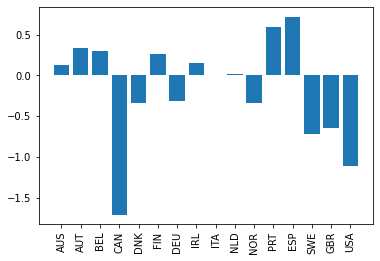

In [485]:
import matplotlib.pyplot as plt

plt.bar(LIR_SIR_2023['Location'], LIR_SIR_2023['IVC_Q'])
plt.xticks(rotation=90)
plt.show()

Although there is no significant impact between the IVC and the economic downturn, there is some association, so Canada, Denmark, Germany, Norway, Sweden, the UK and the USA with a negative IVC in Q1 2023 should look closely for the economic recession.